In [92]:
import pandas as pd

uni_data= pd.read_csv('cwurData.csv')

uni_data



,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,969.0,816,44.03,2015
2196,997,Alexandria University,Egypt,4,236,566,218,997,908,645,981.0,871,44.03,2015
2197,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,975.0,824,44.03,2015
2198,999,University of A Coruña,Spain,40,367,567,218,886,974,812,975.0,651,44.02,2015


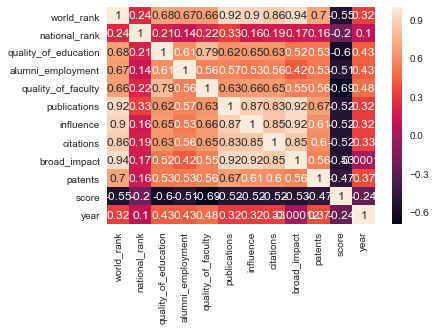

In [93]:
import seaborn as sns

sns.heatmap(uni_data.corr(), annot = True)

In [94]:
data = uni_data[['publications', 'citations', 'influence']].dropna() 
data.describe()

,publications,citations,influence
count,2200.000000,2200.000000,2200.000000
mean,459.908636,413.417273,459.797727
std,303.760352,264.366549,303.331822
min,1.000000,1.000000,1.000000
25%,175.750000,161.000000,175.750000
50%,450.500000,406.000000,450.500000
75%,725.000000,645.000000,725.250000
max,1000.000000,812.000000,991.000000


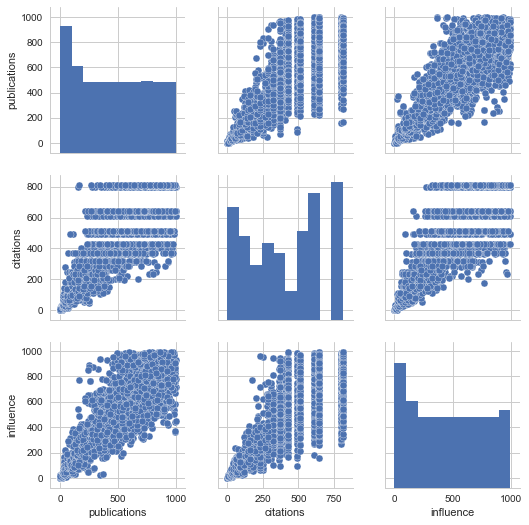

In [95]:
sns.pairplot(data)

In [96]:
#Import useful packages
import pandas #package for data analysis
pandas.set_option('max_rows', 10)
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import statsmodels.api as statsmodels #useful stats package with linear regression functions
import seaborn as sns #very nice plotting package
sns.set(color_codes=True) 




In [97]:
def regression_model(column_x, column_y):
    #this function uses built in library functions to create a scatter plot,
    #plots of the residuals, compute R-squared, and display the regression eqn

    #fit the regression line using "statsmodels" library:
    X = statsmodels.add_constant(data[column_x])
    Y = data[column_y]
    regressionmodel = statsmodels.OLS(Y,X).fit() #OLS stands for "ordinary least squares"

    #extract regression parameters from model, rounded to 3 decimal places:
    Rsquared = round(regressionmodel.rsquared,3)
    slope = round(regressionmodel.params[1],3)
    intercept = round(regressionmodel.params[0],3)

    #make plots:
    sns.set_style("whitegrid")
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(12,4))
    sns.regplot(x=column_x, y=column_y, data=data, marker="+", ax=ax1) #scatter plot
    sns.residplot(x=column_x, y=column_y, data=data, ax=ax2) #residual plot
    ax2.set(ylabel='Residuals')
    ax2.set_ylim(min(regressionmodel.resid)-1,max(regressionmodel.resid)+1)
    plt.figure(figsize=(5.5,4)) #histogram
    sns.distplot(regressionmodel.resid, kde=True, axlabel='Residuals', color='red') #histogram

    #print the results:
    print("R-squared = ",Rsquared)
    print("Regression equation: "+column_y+" = ",slope,"* "+column_x+" + ",intercept)
    


R-squared =  0.766
Regression equation: influence =  0.874 * publications +  57.968


C:\Users\almag\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              citations   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     4864.
Date:                Sun, 03 Feb 2019   Prob (F-statistic):               0.00
Time:                        01:15:16   Log-Likelihood:                -14107.
No. Observations:                2200   AIC:                         2.822e+04
Df Residuals:                    2198   BIC:                         2.823e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           81.2332      5.708     14.232      0.000      70.040      92.426
publications     0.7223      0.010     69.742      0.000       0.702       0.743
==============================================================================
Omnibus:                      123.299   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.559
Skew:                           0.528   Prob(JB):                     1.36e-35
Kurtosis:                       3.797   Cond. No.                     1.00e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

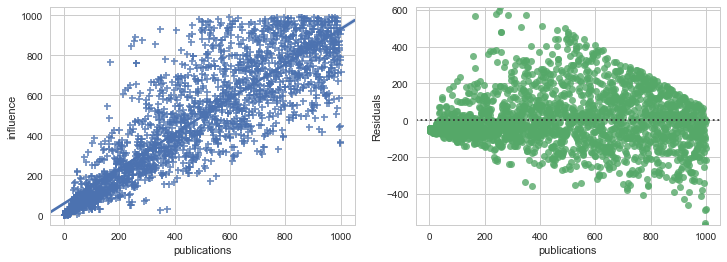

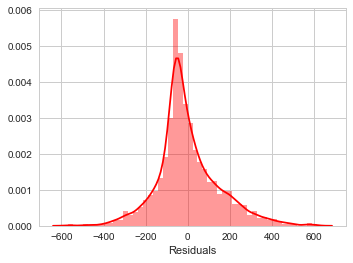

In [103]:
    regression_model('publications', 'influence')
    regressionmodel.summary()
  

In [104]:
def mult_regression(column_x, column_y):
    ''' this function uses built in library functions to construct a linear 
    regression model with potentially multiple predictor variables. It outputs 
    two plots to assess the validity of the model.'''

    #If there is only one predictor variable, plot the regression line
    if len(column_x)==1:
        plt.figure()
        sns.regplot(x=column_x[0], y=column_y, data=data, marker="+",fit_reg=True,color='orange')
    
    #define predictors X and response Y:
    X = data[column_x]
    X = statsmodels.add_constant(X)
    Y = data[column_y]
    
    #construct model:
    global regressionmodel 
    regressionmodel = statsmodels.OLS(Y,X).fit() #OLS stands for "ordinary least squares"

    #residual plot:
    plt.figure()
    residualplot = sns.residplot(x=regressionmodel.predict(), y=regressionmodel.resid, color='green')
    residualplot.set(xlabel='Fitted values for '+column_y, ylabel='Residuals')
    residualplot.set_title('Residuals vs Fitted values',fontweight='bold',fontsize=14)
    
    #QQ plot:
    qqplot = statsmodels.qqplot(regressionmodel.resid,fit=True,line='45')
    qqplot.suptitle("Normal Probability (\"QQ\") Plot for Residuals",fontweight='bold',fontsize=14)
    

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              influence   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     7177.
Date:                Sun, 03 Feb 2019   Prob (F-statistic):               0.00
Time:                        01:06:02   Log-Likelihood:                -14098.
No. Observations:                2200   AIC:                         2.820e+04
Df Residuals:                    2198   BIC:                         2.821e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           57.9676      5.684     10.198      0.000      46.821      69.114
publications     0.8737      0.010     84.716      0.000       0.853       0.894
==============================================================================
Omnibus:                      183.577   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              325.777
Skew:                           0.587   Prob(JB):                     1.81e-71
Kurtosis:                       4.474   Cond. No.                     1.00e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

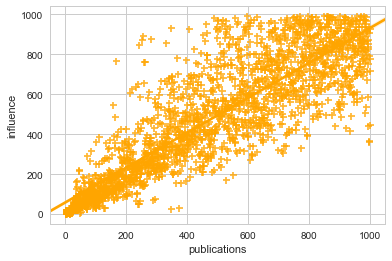

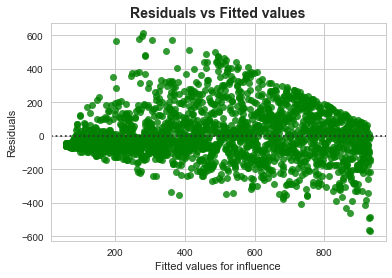

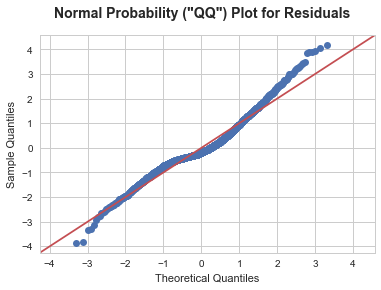

In [84]:
mult_regression (['publications'], 'influence')
regressionmodel.summary()

In [105]:
print(data['publications'].corr(data['influence']))

0.874951645926655


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              influence   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     5497.
Date:                Sun, 03 Feb 2019   Prob (F-statistic):               0.00
Time:                        01:16:12   Log-Likelihood:                -14315.
No. Observations:                2200   AIC:                         2.863e+04
Df Residuals:                    2198   BIC:                         2.865e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.8728      6.418      9.173      0.000      46.287      71.459
citations      0.9698      0.013     74.144      0.000       0.944       0.995
==============================================================================
Omnibus:                       83.261   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.937
Skew:                           0.331   Prob(JB):                     8.24e-30
Kurtosis:                       4.012   Cond. No.                         911.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

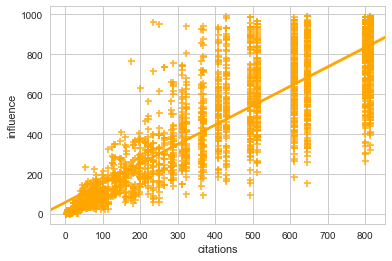

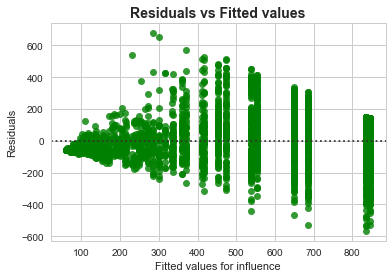

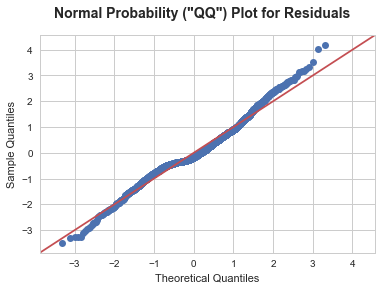

In [106]:
mult_regression (['citations'], 'influence')
regressionmodel.summary()

In [87]:
print(data['citations'].corr(data['influence']))

0.8452068060884924


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              influence   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     4717.
Date:                Sun, 03 Feb 2019   Prob (F-statistic):               0.00
Time:                        01:16:20   Log-Likelihood:                -13861.
No. Observations:                2200   AIC:                         2.773e+04
Df Residuals:                    2197   BIC:                         2.774e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           22.3095      5.333      4.183      0.000      11.851      32.768
publications     0.5567      0.017     33.539      0.000       0.524       0.589
citations        0.4390      0.019     23.018      0.000       0.402       0.476
==============================================================================
Omnibus:                       87.602   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.149
Skew:                           0.273   Prob(JB):                     5.62e-39
Kurtosis:                       4.274   Cond. No.                     1.38e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

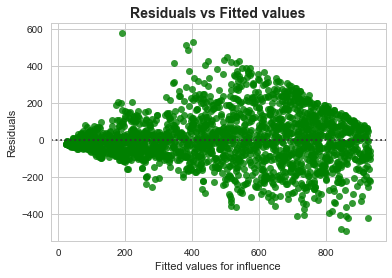

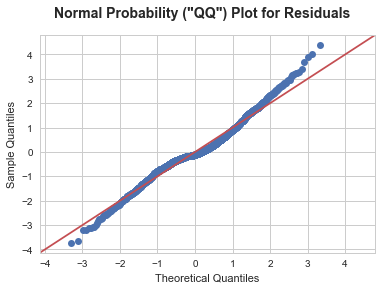

In [107]:
mult_regression (['publications', 'citations'], 'influence')
regressionmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              citations   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     4864.
Date:                Sun, 03 Feb 2019   Prob (F-statistic):               0.00
Time:                        01:08:05   Log-Likelihood:                -14107.
No. Observations:                2200   AIC:                         2.822e+04
Df Residuals:                    2198   BIC:                         2.823e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           81.2332      5.708     14.232      0.000      70.040      92.426
publications     0.7223      0.010     69.742      0.000       0.702       0.743
==============================================================================
Omnibus:                      123.299   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.559
Skew:                           0.528   Prob(JB):                     1.36e-35
Kurtosis:                       3.797   Cond. No.                     1.00e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

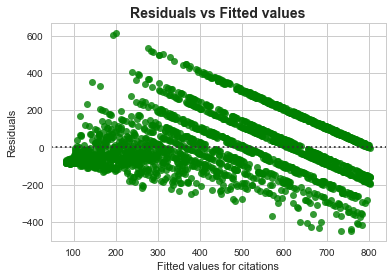

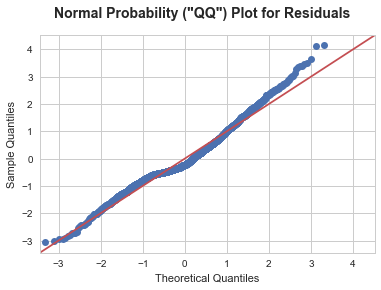

In [89]:
mult_regression ('publications', 'citations')
regressionmodel.summary()

In [110]:
from scipy import stats
t= stats.t.ppf(0.975,2218)
t

1.961034112715069

In [111]:
stats.t.sf(t,2198)

0.02500056859950679